Opening image files and saving images into files are the start and finish of image processing, and there are several subtleties you must be aware of.

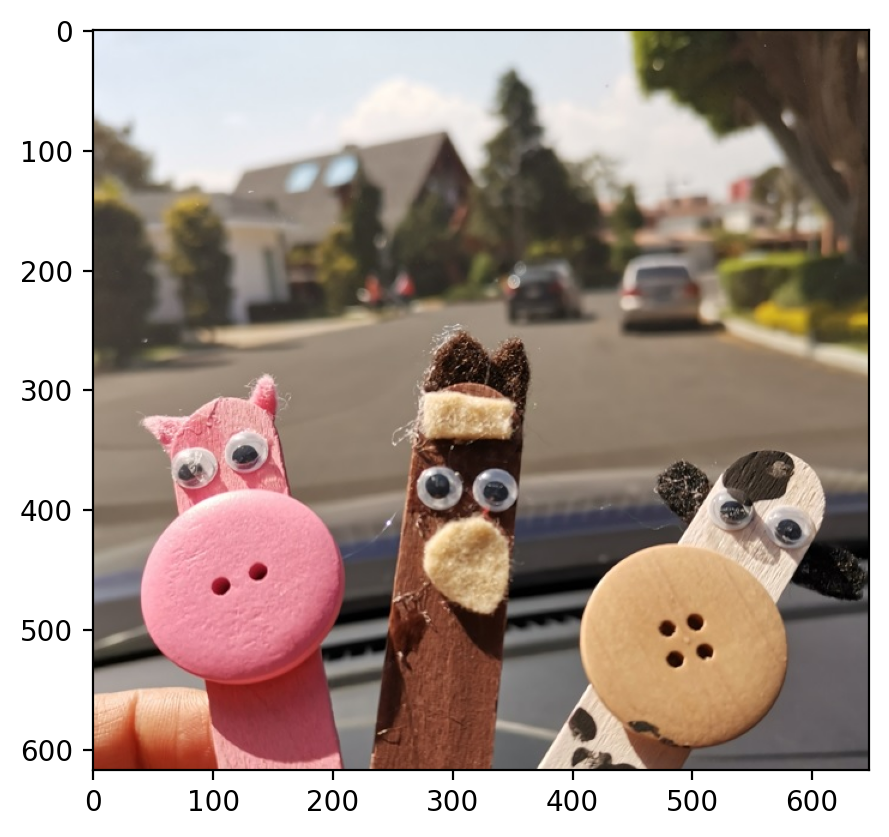

In [5]:
#opening a JPEG image using the pyplot.imread function

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'

jpeg = plt.imread('stickanimals.jpg')
plt.imshow(jpeg)

JPEG is an image format that uses lossy compression, that means the compression slightly modifies the image but it can achieve amazing compression ratios.

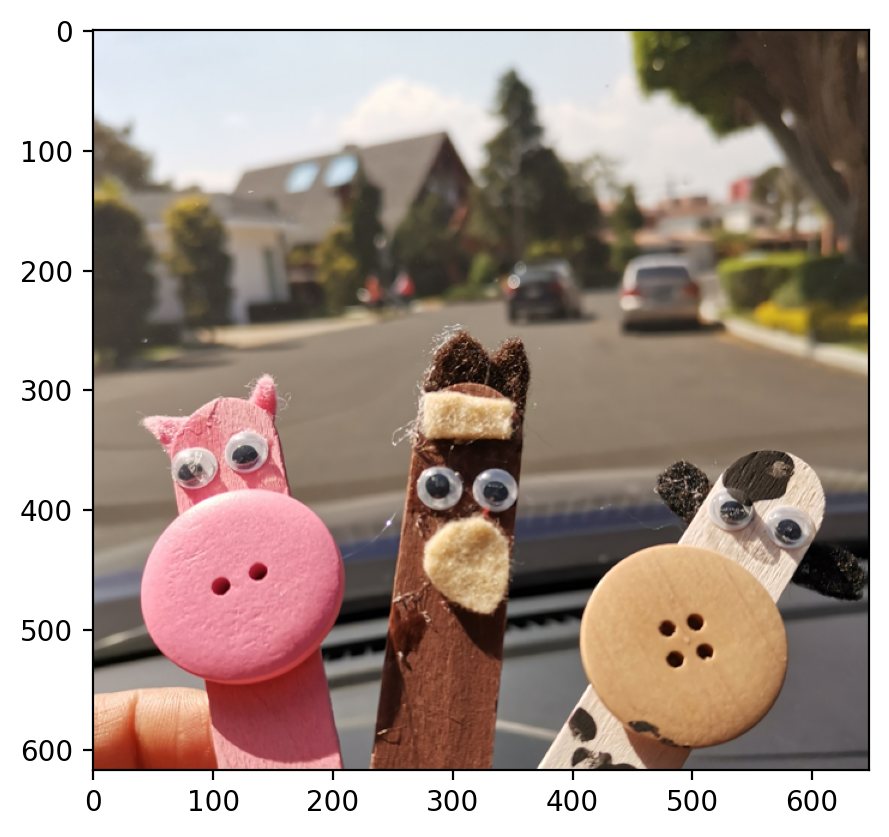

In [6]:
#opening an equivalent PNG image file

png = plt.imread('stickanimalsRGBA.png')
plt.imshow(png)

PNG does not use lossless compression, the pixels remain unchanged.

In [7]:
#checking the dimensions

print(np.shape(jpeg))
print(np.shape(png))

(617, 648, 3)
(617, 648, 4)


We can see that JPEG has 3 color channels but PNG has 4 color channels.

In [8]:
#inspecting upper left pixel which is the first pixel

print(jpeg[0,0])
print(png[0,0])

[230 238 251]
[0.9019608  0.93333334 0.9882353  1.        ]


The JPEG is encoding the pixels between 0-255 and the PNG is encoding them as floating point numbers from 0-1.

In [9]:
#checking the datatype

print('JPEG image type: ', type(jpeg[[0,0,0]]))
print('PNG image type: ', type(png[[0,0,0]]))

JPEG image type:  <class 'numpy.ndarray'>
PNG image type:  <class 'numpy.ndarray'>


In [10]:
#convert an RGBA image array that represents data with floating point numbers from 0 to 1 into the RGB integer format from 0 to 255, we need to change 4 things:

# 1) Get rid of the A channel
# 2) Multiply by 255
# 3) Round the resulting values
# 4) Ensure values are between 0 and 255
# 5) Convert data to 8-bit integers

def adapt_PNG(the_PNG):
    the_PNG = the_PNG[:,:,:3]      # Step 1
    the_PNG = the_PNG * 255        # Step 2
    the_PNG = adapt_image(the_PNG) # Steps 3, 4, 5
    return the_PNG


#the following function will be useful to perform steps 3, 4, and 5 for RGB images in the 0-255 range, which are undergoing operationsthat may result in floating point numbers.
#incase image goes beyond the 0-255 range
def adapt_image(the_img):
    return np.uint8(np.clip(the_img.round(),0,255)) # Steps 3, 4, 5

In [12]:
#saving a file
#extracting the image as a subarray

horsie = jpeg[250:600,200:400,:]
plt.imsave('horsie.jpg',horsie)